In [1]:
import os
from os import listdir
from os.path import join
import matplotlib.pyplot as plt
import numpy as np

import torch
from dust3r.inference import demo, make_batches, loss_of_one_batch
from dust3r.losses import *
from dust3r.model import AsymmetricCroCo3DStereo, inf
from dust3r.utils.viz import ReverseImgNorm, get_nonzero_xys, ReverseCoordNorm

/home/kh775/.conda/envs/c3po/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def viz(view1, view2, pred1, pred2):
    fig, axes = plt.subplots(1, 4, figsize=(16, 4)) 
    plan = view1["img"].permute(0, 2, 3, 1)[0].cpu().numpy()
    photo = view2["img"].permute(0, 2, 3, 1)[0].cpu().numpy()

    axes[0].imshow(ReverseImgNorm(plan))
    pred = pred2["pts3d_in_other_view"][0].detach().cpu().numpy()
    photo_coords = get_nonzero_xys(view2["xys"][0].cpu())
    photo_xs = photo_coords[:,0].numpy()
    photo_ys = photo_coords[:,1].numpy()
    pred = np.stack((pred[photo_ys, photo_xs, 0], pred[photo_ys, photo_xs, 2]), axis=1)
    pred = ReverseCoordNorm(pred, image_size)
    axes[0].scatter(pred[:,0], pred[:,1], s=5)
    axes[0].set_title("pred")

    axes[1].imshow(ReverseImgNorm(plan))
    gt = get_nonzero_xys(view1["xys"][0].cpu()).numpy()
    axes[1].scatter(gt[:,0], gt[:,1], s=5)
    axes[1].set_title("groundtruth")

    axes[2].imshow(ReverseImgNorm(photo))
    axes[2].scatter(photo_xs, photo_ys, s=1, c="red") 
    axes[2].set_title("photo + correspondence")

    axes[3].imshow(ReverseImgNorm(photo))
    axes[3].set_title("photo")

    plt.tight_layout()
    plt.show()
    plt.close()

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device)

image_size = 512
model = AsymmetricCroCo3DStereo(
    pos_embed='RoPE100', 
    patch_embed_cls='ManyAR_PatchEmbed', 
    img_size=(image_size, image_size), 
    head_type='dpt', 
    output_mode='pts3d', 
    depth_mode=('exp', -inf, inf), 
    conf_mode=('exp', 1, inf), 
    enc_embed_dim=1024, 
    enc_depth=24, 
    enc_num_heads=16, 
    dec_embed_dim=768, 
    dec_depth=12, 
    dec_num_heads=12
)
model.to(device)
criterion = eval("PointLoss(L21)")
demo_dir = "demo/"
ckpt_path = join(demo_dir, "ckpt.pth")
ckpt = torch.load(ckpt_path, map_location=device)
model.load_state_dict(ckpt['model'], strict=False)
del ckpt



/tmp/ipykernel_1666170/1891487129.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_path, map_location=device)


 - adding demo/images/plans/093510_plan.jpg with resolution 664x1024 --> 512x512
 - adding demo/images/photos/093510_photo.jpg with resolution 1800x1350 --> 512x512
 (Found 2 images)
Building Train (heldout)/Test Data loader for dataset
Train (heldout)/Test dataset length: 1


/share/phoenix/nfs06/S9/kh775/C3Po/dust3r/inference.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=bool(use_amp)):
/share/phoenix/nfs06/S9/kh775/C3Po/dust3r/model.py:223: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/share/phoenix/nfs06/S9/kh775/C3Po/dust3r/inference.py:58: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/share/phoenix/nfs06/S9/kh775/C3Po/dust3r/losses.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(2 * (array / (image_dim - 1)) - 1

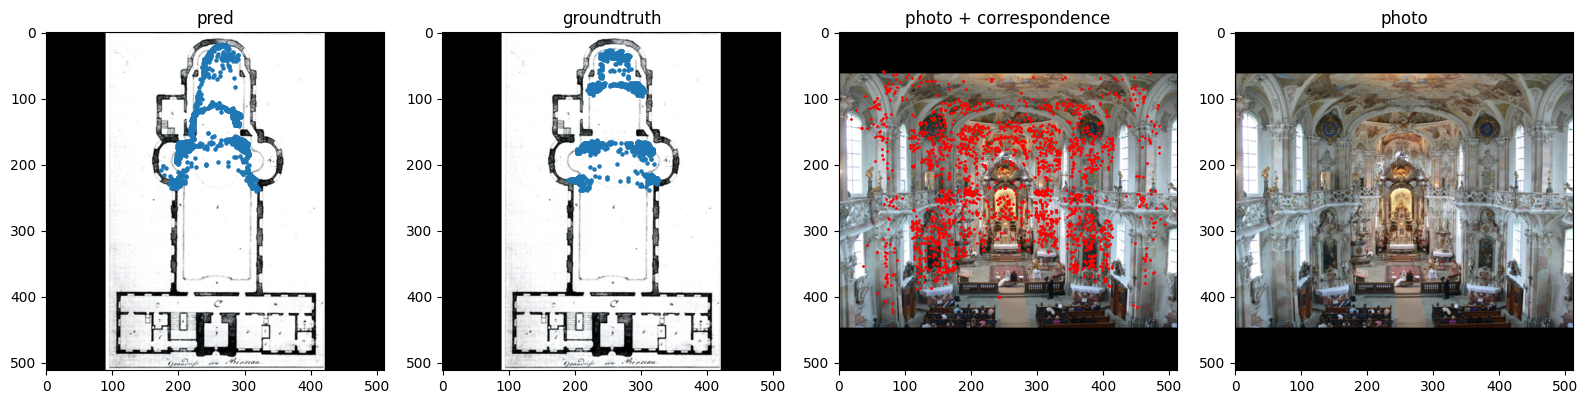

 - adding demo/images/plans/096803_plan.jpg with resolution 515x1008 --> 512x512
 - adding demo/images/photos/096803_photo.jpg with resolution 504x600 --> 512x512
 (Found 2 images)
Building Train (heldout)/Test Data loader for dataset
Train (heldout)/Test dataset length: 1


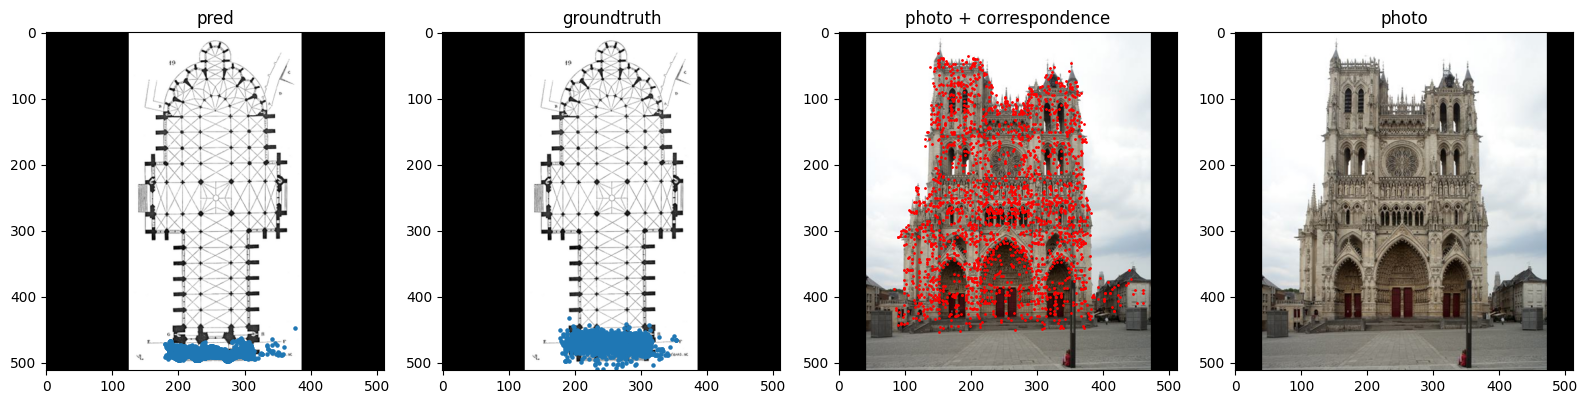

 - adding demo/images/plans/098842_plan.jpg with resolution 1000x969 --> 512x512
 - adding demo/images/photos/098842_photo.jpg with resolution 1800x1350 --> 512x512
 (Found 2 images)
Building Train (heldout)/Test Data loader for dataset
Train (heldout)/Test dataset length: 1


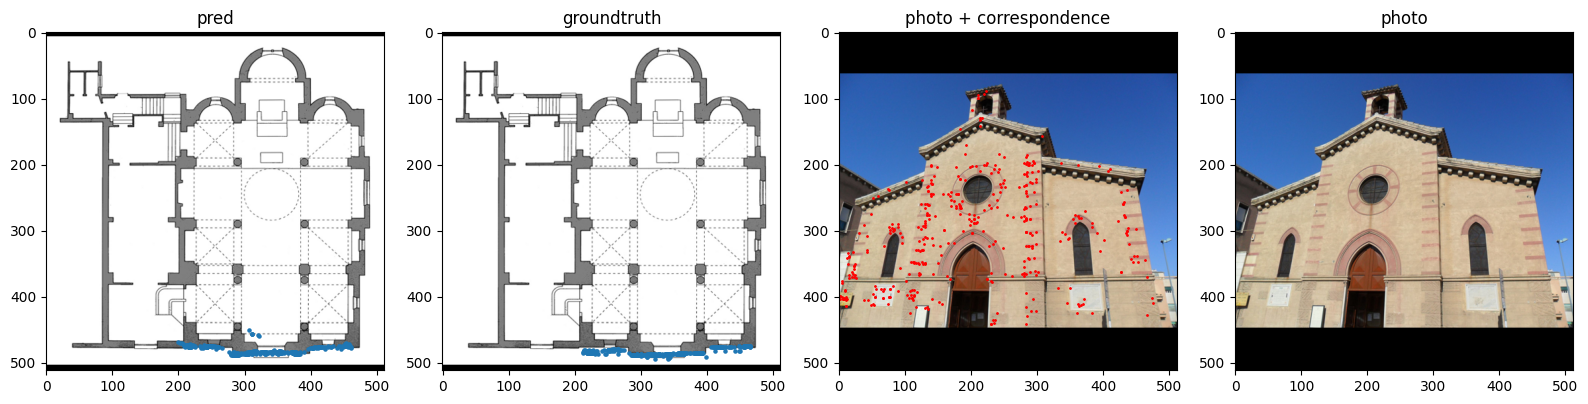

 - adding demo/images/plans/099223_plan.jpg with resolution 1256x727 --> 512x512
 - adding demo/images/photos/099223_photo.jpg with resolution 1600x1200 --> 512x512
 (Found 2 images)
Building Train (heldout)/Test Data loader for dataset
Train (heldout)/Test dataset length: 1


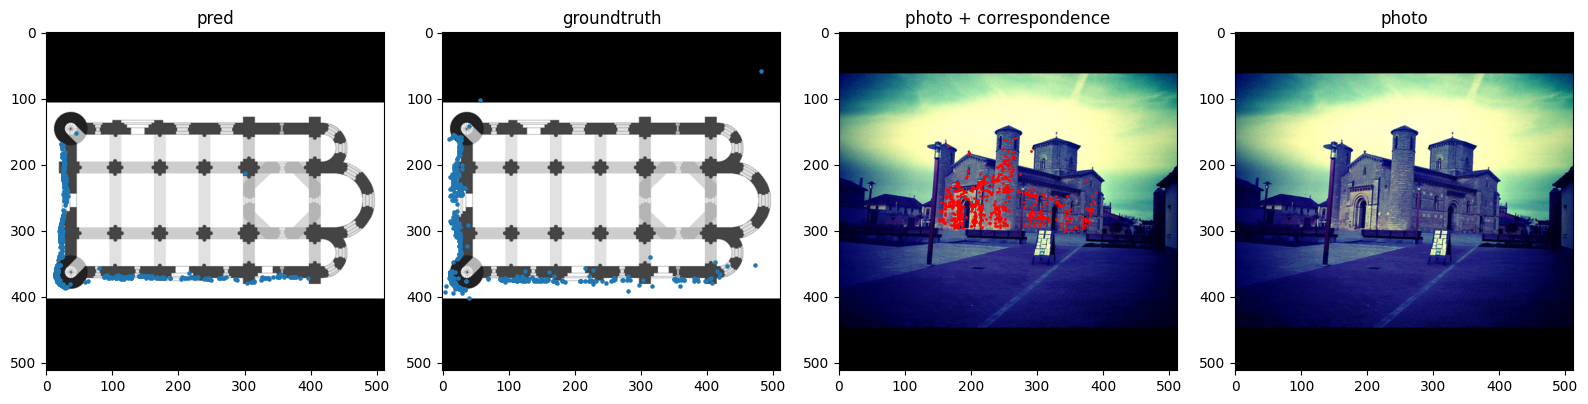

 - adding demo/images/plans/100122_plan.jpg with resolution 414x688 --> 512x512
 - adding demo/images/photos/100122_photo.jpg with resolution 3456x2304 --> 512x512
 (Found 2 images)
Building Train (heldout)/Test Data loader for dataset
Train (heldout)/Test dataset length: 1


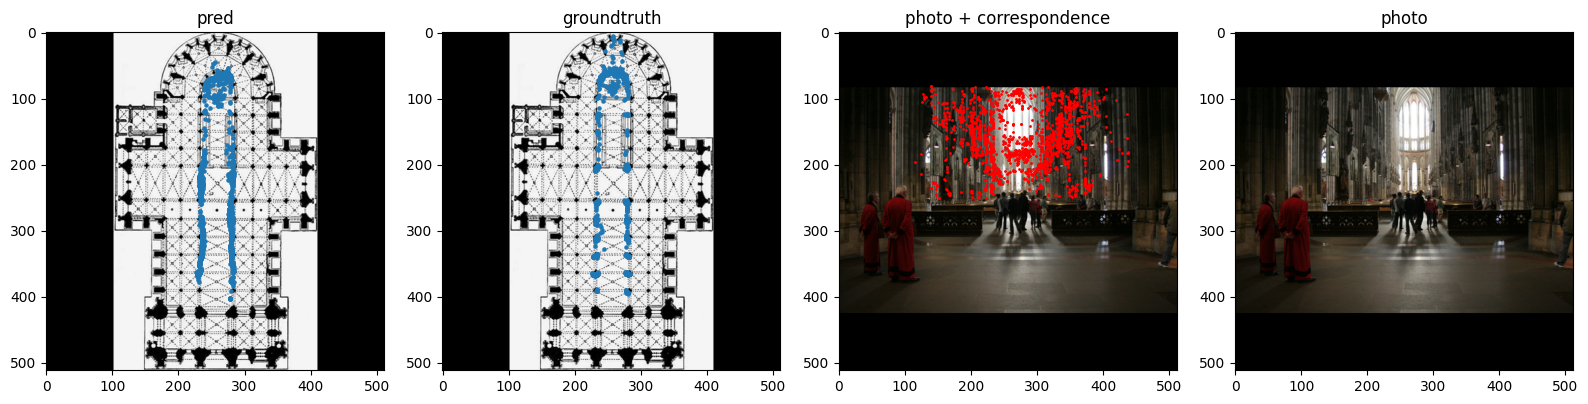

 - adding demo/images/plans/103032_plan.jpg with resolution 1147x1850 --> 512x512
 - adding demo/images/photos/103032_photo.jpg with resolution 1800x1196 --> 512x512
 (Found 2 images)
Building Train (heldout)/Test Data loader for dataset
Train (heldout)/Test dataset length: 1


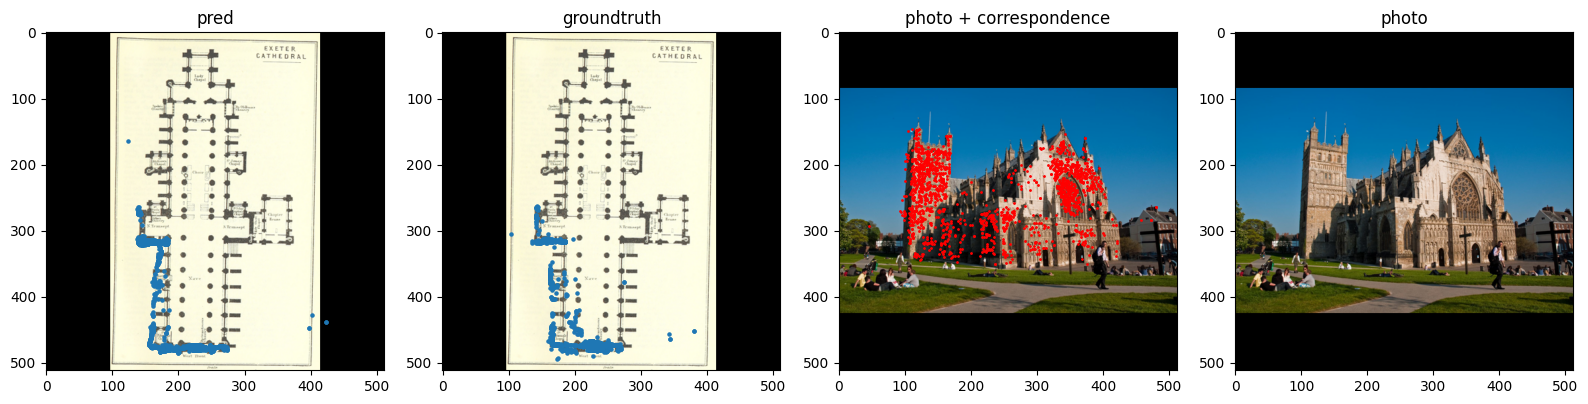

 - adding demo/images/plans/103448_plan.jpg with resolution 2449x1052 --> 512x512
 - adding demo/images/photos/103448_photo.jpg with resolution 1800x3200 --> 512x512
 (Found 2 images)
Building Train (heldout)/Test Data loader for dataset
Train (heldout)/Test dataset length: 1


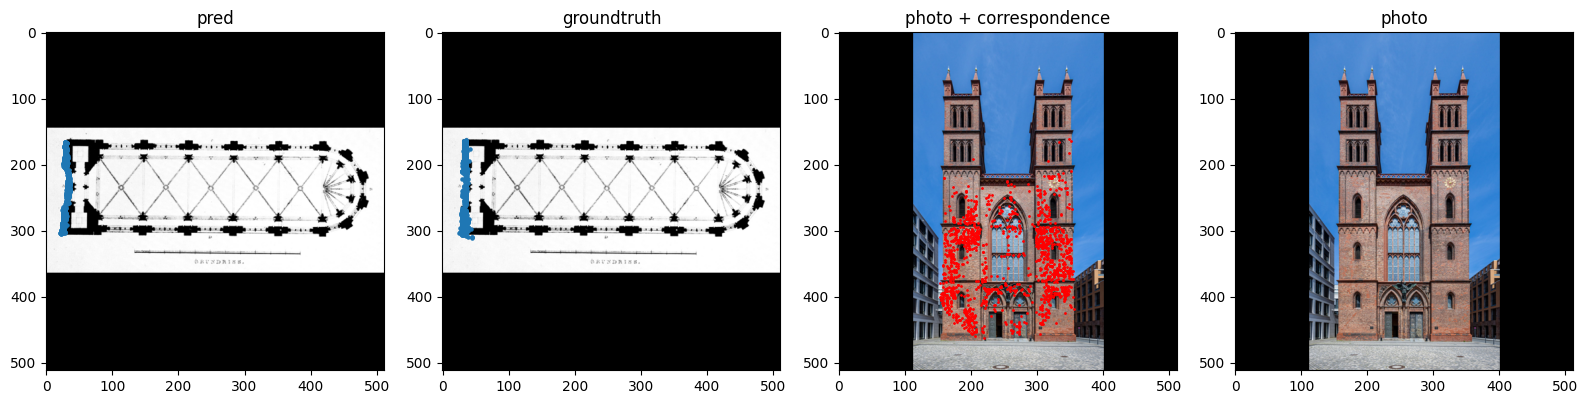

 - adding demo/images/plans/103705_plan.jpg with resolution 686x1260 --> 512x512
 - adding demo/images/photos/103705_photo.jpg with resolution 1800x1350 --> 512x512
 (Found 2 images)
Building Train (heldout)/Test Data loader for dataset
Train (heldout)/Test dataset length: 1


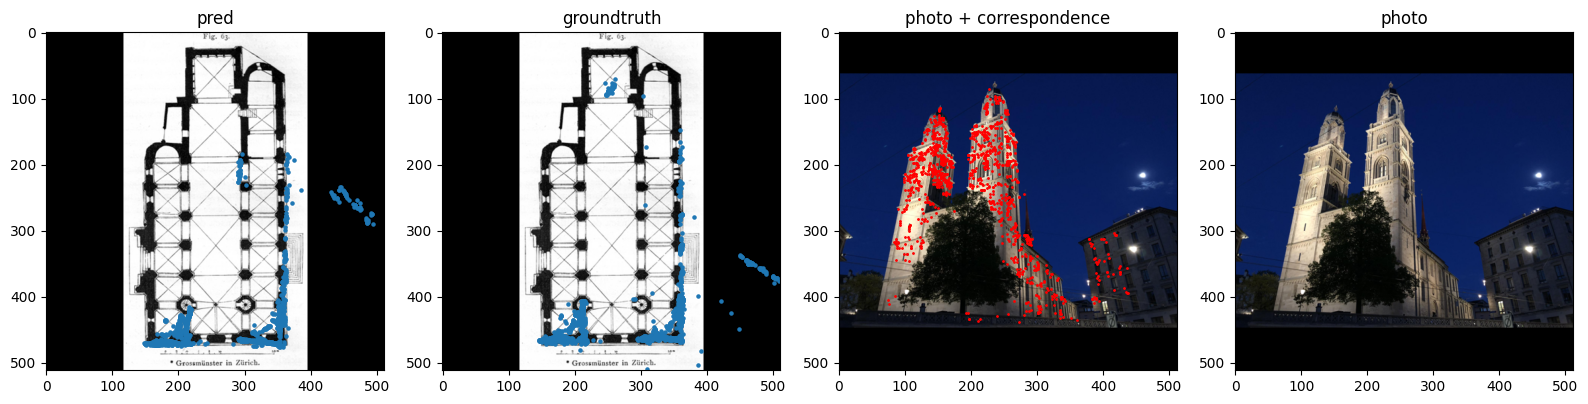

 - adding demo/images/plans/108022_plan.jpg with resolution 879x2143 --> 512x512
 - adding demo/images/photos/108022_photo.jpg with resolution 1800x1350 --> 512x512
 (Found 2 images)
Building Train (heldout)/Test Data loader for dataset
Train (heldout)/Test dataset length: 1


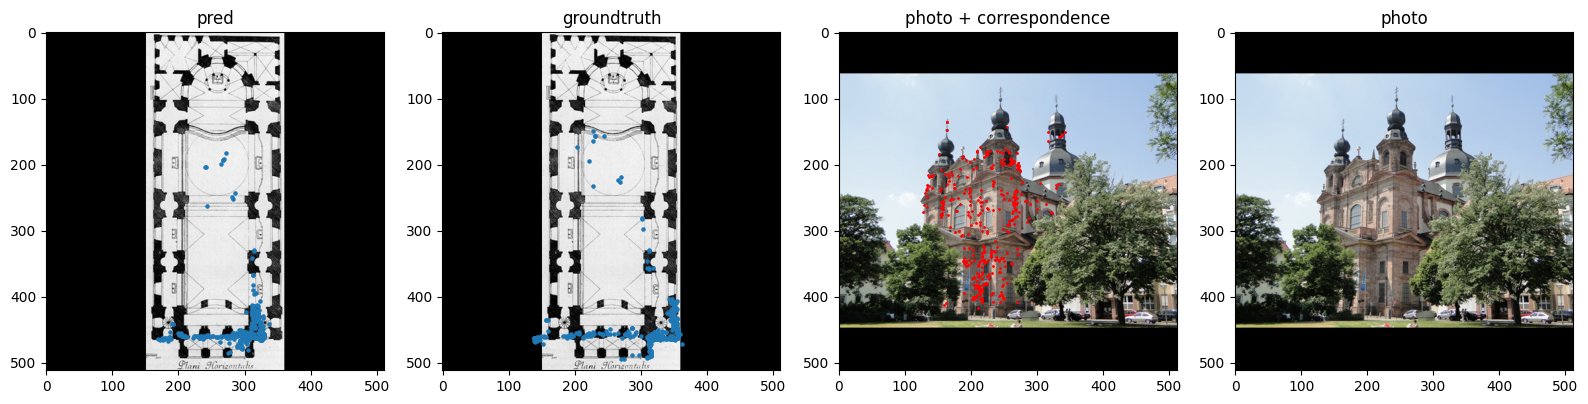

 - adding demo/images/plans/108856_plan.jpg with resolution 2167x2906 --> 512x512
 - adding demo/images/photos/108856_photo.jpg with resolution 1800x1150 --> 512x512
 (Found 2 images)
Building Train (heldout)/Test Data loader for dataset
Train (heldout)/Test dataset length: 1


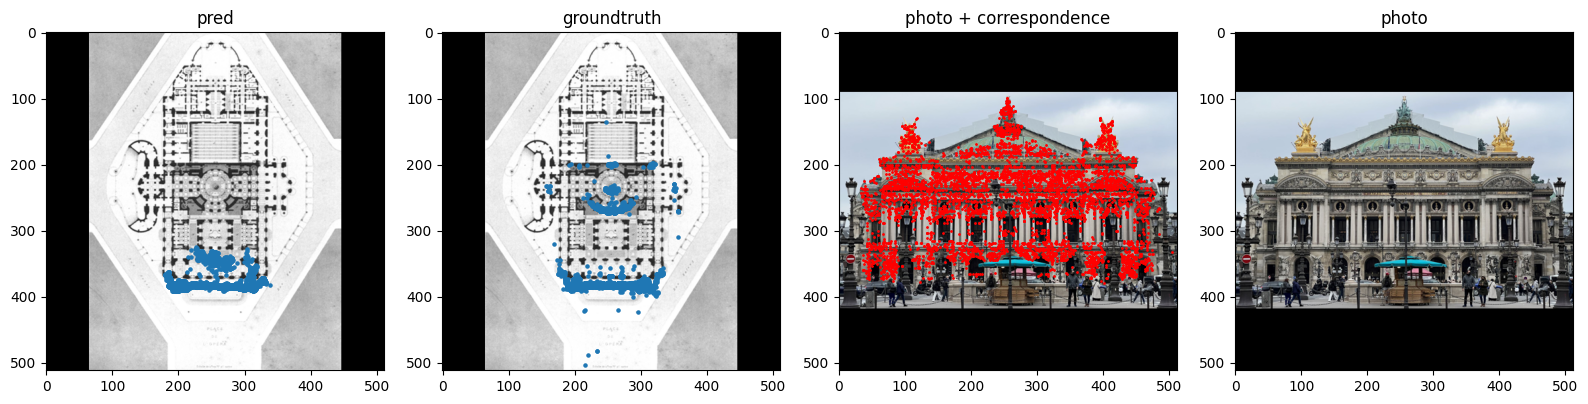

 - adding demo/images/plans/111513_plan.jpg with resolution 922x922 --> 512x512
 - adding demo/images/photos/111513_photo.jpg with resolution 1800x1469 --> 512x512
 (Found 2 images)
Building Train (heldout)/Test Data loader for dataset
Train (heldout)/Test dataset length: 1


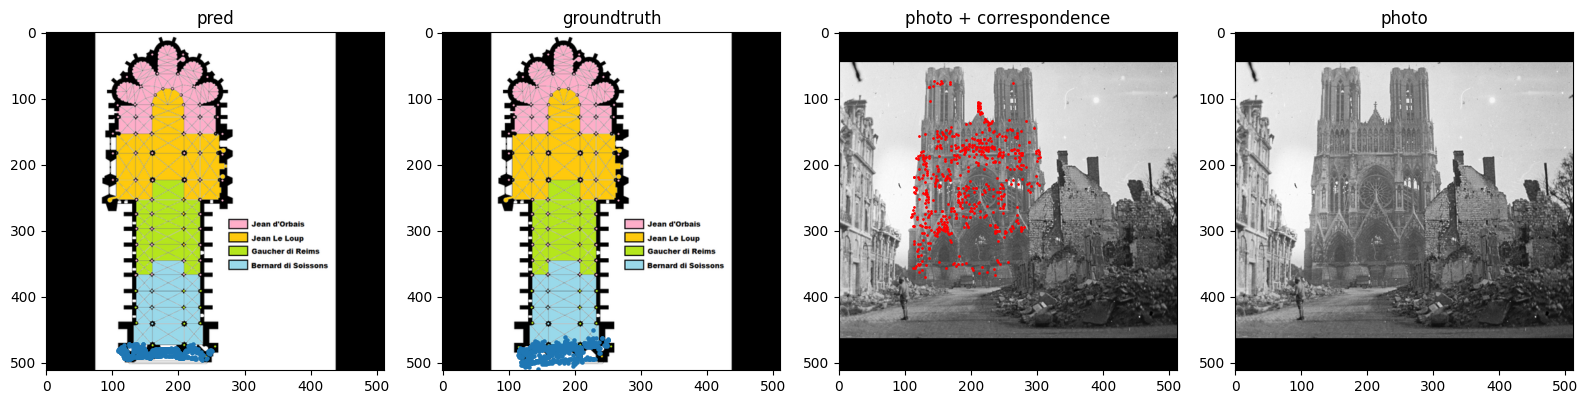

 - adding demo/images/plans/116620_plan.jpg with resolution 1092x1738 --> 512x512
 - adding demo/images/photos/116620_photo.jpg with resolution 1800x1149 --> 512x512
 (Found 2 images)
Building Train (heldout)/Test Data loader for dataset
Train (heldout)/Test dataset length: 1


 - adding demo/images/plans/118234_plan.jpg with resolution 800x363 --> 512x512
 - adding demo/images/photos/118234_photo.jpg with resolution 1800x1350 --> 512x512
 (Found 2 images)
Building Train (heldout)/Test Data loader for dataset
Train (heldout)/Test dataset length: 1


 - adding demo/images/plans/119882_plan.jpg with resolution 2623x1749 --> 512x512
 - adding demo/images/photos/119882_photo.jpg with resolution 1800x1593 --> 512x512
 (Found 2 images)
Building Train (heldout)/Test Data loader for dataset
Train (heldout)/Test dataset length: 1


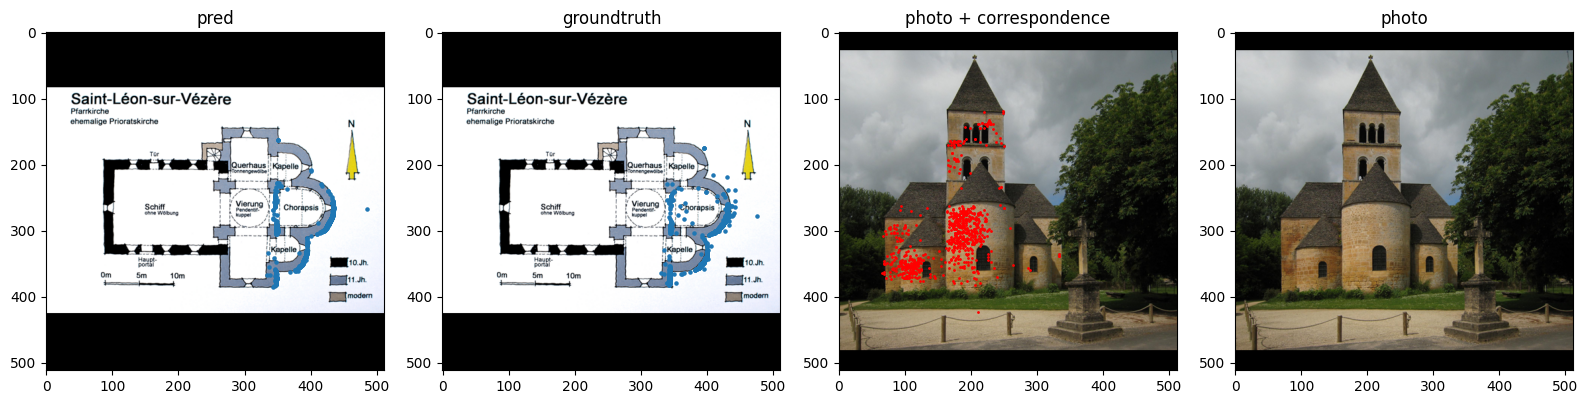

In [4]:
ids = [i.replace(".npy", "") for i in sorted(listdir(join(demo_dir, "coords")))]
for id in ids:
    plan_path = join(demo_dir, "images", "plans", f"{id}_plan.jpg")
    photo_path = join(demo_dir, "images", "photos", f"{id}_photo.jpg")
    cor_path = join(demo_dir, "coords", f"{id}.npy")
    batches = make_batches(plan_path, photo_path, cor_path, batch_size=1)
    for batch in batches:
        output = loss_of_one_batch(
            batch, 
            model=model, 
            criterion=criterion, 
            device=device, 
            symmetrize_batch=False, 
            use_amp=False, 
            ret=None
        )
        view1 = output["view1"]
        view2 = output["view2"]
        pred1 = output["pred1"]
        pred2 = output["pred2"]

        viz(view1, view2, pred1, pred2)
